In [1]:
# Imports 
# open folder
from os import makedirs
from os import listdir
import os
from shutil import copyfile

# open image
import cv2
from PIL import Image

# random 
from random import seed
from random import random

# basic
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# image augmentation
import albumentations as A

In [3]:
%pwd

'e:\\Project\\PoultryDiseaseDetection\\code'

In [4]:
os.chdir("../")
%pwd

'e:\\Project\\PoultryDiseaseDetection'

01. Make Dataset_train_valid_test
   ---

In [11]:
# create diretories 
# train test validate
dataset_home = 'dataset_train_valid_test/' # name of diretories
subdirs = ['train/', 'valid/','test/'] # sub diretories
for subdir in subdirs:
    # create label subdirectories
    labeldirs = ['cocci/', 'healthy/','ncd/', 'salmo']
    for labldir in labeldirs:
        newdir = dataset_home + subdir + labldir
        makedirs(newdir, exist_ok=True)

In [6]:
# seed random number generator
seed(42)

# define ratio of pictures to divide 
# train:80/test:10/valid:10 
val_ratio_1 = 0.2 # divide 80/20 of all data 
val_ratio_2 = 0.5 # divide 50/50 of divided 20% all data

In [12]:
# you can `download dataset form https://doi.org/10.5281/zenodo.5801834, https://doi.org/10.5281/zenodo.4628934`
# and bring all together in a folder 
# you must rename image data for pcr dataset such as pcrcocci.1.jpg to cocci.x.jpg
# (x follow by after order from farmmer-labeled dataset)
src_directory = 'all_new' # path diretories have all data

# random data form all diretories to of each subdirectories
for file in listdir(src_directory):
    src = src_directory + '/' + file
    dst_dir = 'train/'
    
    # train valid test split
    if random() < val_ratio_1: # 80/20
        if random() < val_ratio_2: # 50/50 
            dst_dir = 'test/'
        else :
            dst_dir = 'valid/'
            
    # copyimages into subdirectories
    if file.startswith('cocci'):
        dst = dataset_home + dst_dir + 'cocci/'+ file
        copyfile(src, dst)
    elif file.startswith('healthy'):
        dst = dataset_home + dst_dir + 'healthy/' + file
        copyfile(src, dst)
    elif file.startswith('ncd'):
        dst = dataset_home + dst_dir + 'ncd/' + file
        copyfile(src, dst)
    elif file.startswith('salmo'):
        dst = dataset_home + dst_dir + 'salmo/' + file
        copyfile(src, dst)

In [13]:
# Recheck
# cocci in train
train_cocci = len(listdir('dataset_train_valid_test/train/cocci/'))
# cocci in test
test_cocci = len(listdir('dataset_train_valid_test/test/cocci/'))
# cocci in valid
valid_cocci = len(listdir('dataset_train_valid_test/valid/cocci/'))

In [14]:
# Show percent of each subdirectories in cocci class
print(f"train : {round(train_cocci/(train_cocci+test_cocci+valid_cocci),3)}")
print(f"test : {round(test_cocci/(train_cocci+test_cocci+valid_cocci),3)}")
print(f"validate : {round(valid_cocci/(train_cocci+test_cocci+valid_cocci),3)}")

train : 0.81
test : 0.097
validate : 0.093


---


1.  Image Augmentation
   ---

In [15]:
# check number of each group in train subdirectories
train_cocci = len(listdir('dataset_train_valid_test/train/cocci/'))
train_ncd = len(listdir('dataset_train_valid_test/train/ncd/'))
train_healthy = len(listdir('dataset_train_valid_test/train/healthy/'))
train_salmo = len(listdir('dataset_train_valid_test/train/salmo/'))

In [16]:
# imbalance class in ncd just have 450 image
print(f"Train dataset cocci class : {train_cocci}")
print(f"Train dataset ncd class : {train_ncd}")
print(f"Train dataset healthy class : {train_healthy}")
print(f"Train dataset salmo class : {train_salmo}")

Train dataset cocci class : 2006
Train dataset ncd class : 446
Train dataset healthy class : 1905
Train dataset salmo class : 2063


In [17]:
# use technique image augmentation for increase image data in class ncd
# for help imbalance class problem

# image augmentation flip horizontal(mirror) image 
transform_flip = A.Compose([A.HorizontalFlip(always_apply=True)])

# image augmentation rotation image 45 degree angle, rescale 10% and shift 0.062%
transform_shift = A.Compose([A.ShiftScaleRotate(shift_limit=(0.0625, 0.0625), 
                                                scale_limit=(0.1, 0.1), 
                                                rotate_limit=(45, 45),
                                                p=1.0)])

# image augmentation add gaussian noise and decrease brightness
transform_noise = A.Compose([A.GaussNoise(var_limit=(100,200),
                                         mean=-30,
                                         p=1.0)])

In [18]:
# open sample image data
image = cv2.imread("./dataset_train_valid_test/train/ncd/ncd.13.jpg")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # convert to pixel numpy array

# transform filp and shift
transformed_flip = transform_flip(image=image)['image']
transformed_shift = transform_shift(image=image)['image']
transformed_noise = transform_noise(image=image)['image']

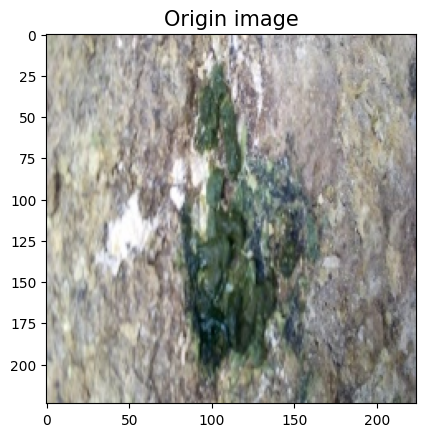

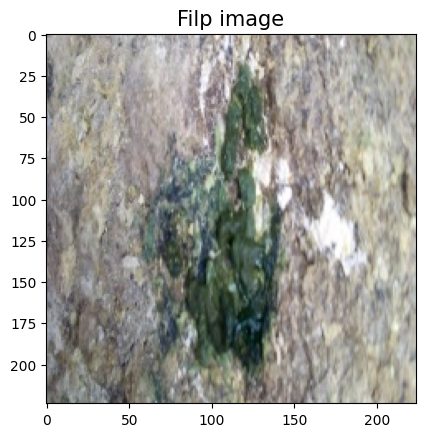

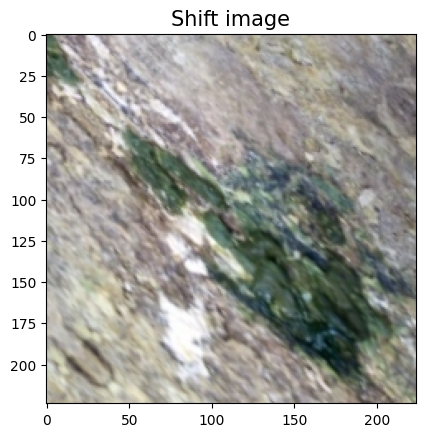

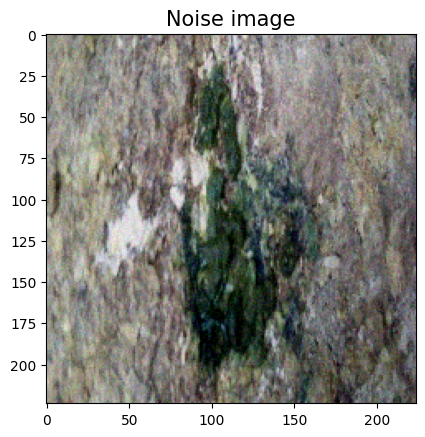

In [19]:
# Show origin and transform image
plt.imshow(image)
plt.title("Origin image", size=15)
plt.show()
plt.imshow(transformed_flip)
plt.title("Filp image", size=15)
plt.show()
plt.imshow(transformed_shift)
plt.title("Shift image", size=15)
plt.show()
plt.imshow(transformed_noise)
plt.title("Noise image", size=15)
plt.show()

In [20]:
# loop for use augmentation of each image in train directory class ncd
src_directory = "dataset_train_valid_test/train/ncd/"

for file in listdir(src_directory):
    image = cv2.imread(src_directory + file)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # transform and save new flie
    transformed_flip = transform_flip(image=image)['image']
    cv2.imwrite(src_directory + file[:-4] + "flip.jpg", cv2.cvtColor(transformed_flip, cv2.COLOR_RGB2BGR))
    
    transformed_shift = transform_shift(image=image)['image']
    cv2.imwrite(src_directory + file[:-4] + "ship.jpg", cv2.cvtColor(transformed_shift, cv2.COLOR_RGB2BGR))
    
    transformed_noise = transform_noise(image=image)['image']
    cv2.imwrite(src_directory + file[:-4] + "noise.jpg", cv2.cvtColor(transformed_noise, cv2.COLOR_RGB2BGR))

In [21]:
# recheck
# we have image ncd class 1800 image 
train_ncd = len(listdir('dataset_train_valid_test/train/ncd/'))
print(f"Train dataset cocci class : {train_cocci}")
print(f"Train dataset ncd class : {train_ncd}")
print(f"Train dataset healthy class : {train_healthy}")
print(f"Train dataset salmo class : {train_salmo}")

Train dataset cocci class : 2006
Train dataset ncd class : 1784
Train dataset healthy class : 1905
Train dataset salmo class : 2063
